In [35]:
# 모델 구현 시간 체크
import time
# 시작시간 체크
start = time.time()

In [36]:
# 패키지 로딩
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 화면 디스플레이 전체 구간을 넓게
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_rows', 999) # pd.options.display.max_rows = 999
pd.set_option('display.max_columns', 999) # pd.options.display.max_columns = 999
pd.set_option('display.width', 1000)

# 한글폰트 적용
plt.rcParams['font.family'] = 'Malgun Gothic'

In [37]:
# 수입 데이터 로딩 (가상데이터)
df_org = pd.read_csv('test.csv')

In [38]:
# 데이터 사이즈 확인
df_org.shape

(81058, 21)

In [39]:
# 데이터 샘플 3개 확인
df_org.sample(10)

,신고번호,신고일자,통관지세관부호,신고인부호,수입자부호,해외거래처부호,특송업체부호,수입통관계획코드,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,신고중량(KG),과세가격원화금액,운송수단유형코드,반입보세구역부호,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,관세율
60564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15040,67602373.0,2020-12-01,10.0,IBFGF,Y3I303J,NaN,NaN,C,B,11.0,21.0,43.0,29056.8,5.026358e+07,40.0,2002079.0,8.443991e+09,JP,JP,CIT,0.0
69160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19455,12142720.0,2020-12-16,20.0,9AYQ5,AG3WWEN,04PEEXL,XIKL72,C,B,11.0,21.0,18.0,5627.5,8.634179e+06,10.0,3078037.0,8.539290e+09,JP,CN,A,8.0
78936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df_org.columns

Index(['신고번호', '신고일자', '통관지세관부호', '신고인부호', '수입자부호', '해외거래처부호', '특송업체부호', '수입통관계획코드', '수입신고구분코드', '수입거래구분코드', '수입종류코드', '징수형태코드', '신고중량(KG)', '과세가격원화금액', '운송수단유형코드', '반입보세구역부호', 'HS10단위부호', '적출국가코드', '원산지국가코드', '관세율구분코드', '관세율'], dtype='object')

In [41]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81058 entries, 0 to 81057
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   신고번호      23163 non-null  float64
 1   신고일자      23163 non-null  object 
 2   통관지세관부호   23163 non-null  float64
 3   신고인부호     23163 non-null  object 
 4   수입자부호     23162 non-null  object 
 5   해외거래처부호   15489 non-null  object 
 6   특송업체부호    7733 non-null   object 
 7   수입통관계획코드  23163 non-null  object 
 8   수입신고구분코드  23163 non-null  object 
 9   수입거래구분코드  23163 non-null  float64
 10  수입종류코드    23163 non-null  float64
 11  징수형태코드    23163 non-null  float64
 12  신고중량(KG)  23163 non-null  float64
 13  과세가격원화금액  23163 non-null  float64
 14  운송수단유형코드  23163 non-null  float64
 15  반입보세구역부호  23163 non-null  float64
 16  HS10단위부호  23163 non-null  float64
 17  적출국가코드    23163 non-null  object 
 18  원산지국가코드   23163 non-null  object 
 19  관세율구분코드   23163 non-null  object 
 20  관세율       23163 non-null  fl

In [42]:
# 범주형 변수 지정
discrete_columns = ['신고일자',  '통관지세관부호',
       '신고인부호', '수입자부호', '해외거래처부호', '특송업체부호', '수입통관계획코드', 
       '수입신고구분코드', '수입거래구분코드',
       '수입종류코드', '징수형태코드', 
       '운송수단유형코드', '반입보세구역부호', 
       'HS10단위부호', '적출국가코드', '원산지국가코드', '관세율구분코드']

# 범주형 변수들을 문자열로 지정 ('object' -> 'string')
for var in discrete_columns:
    df_org[var] = df_org[var].astype(str)

In [43]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81058 entries, 0 to 81057
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   신고번호      23163 non-null  float64
 1   신고일자      81058 non-null  object 
 2   통관지세관부호   81058 non-null  object 
 3   신고인부호     81058 non-null  object 
 4   수입자부호     81058 non-null  object 
 5   해외거래처부호   81058 non-null  object 
 6   특송업체부호    81058 non-null  object 
 7   수입통관계획코드  81058 non-null  object 
 8   수입신고구분코드  81058 non-null  object 
 9   수입거래구분코드  81058 non-null  object 
 10  수입종류코드    81058 non-null  object 
 11  징수형태코드    81058 non-null  object 
 12  신고중량(KG)  23163 non-null  float64
 13  과세가격원화금액  23163 non-null  float64
 14  운송수단유형코드  81058 non-null  object 
 15  반입보세구역부호  81058 non-null  object 
 16  HS10단위부호  81058 non-null  object 
 17  적출국가코드    81058 non-null  object 
 18  원산지국가코드   81058 non-null  object 
 19  관세율구분코드   81058 non-null  object 
 20  관세율       23163 non-null  fl

In [44]:
# 수치형 변수 지정
numeric_columns = ['신고중량(KG)', '과세가격원화금액', '관세율']

# 수치형 변수를 자연로그로 변환
for var in ['신고중량(KG)', '과세가격원화금액']:
    df_org[var] = df_org[var].apply(lambda x: np.log1p(x))

for va in ['관세율'] :
    df_org[va] = df_org[va] * 0.01

In [45]:
df_org.head(10)

,신고번호,신고일자,통관지세관부호,신고인부호,수입자부호,해외거래처부호,특송업체부호,수입통관계획코드,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,신고중량(KG),과세가격원화금액,운송수단유형코드,반입보세구역부호,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,관세율
0,71490948.0,2020-10-01,40.0,VBLHO,3OP9VQA,SCATEYR,nan,F,B,11.0,21.0,11.0,7.846238,9.868735,10.0,2006026.0,2106909099.0,US,US,A,0.080
1,44137011.0,2020-10-01,16.0,WA5M0,83SAUAT,4NISLJN,nan,C,B,11.0,21.0,11.0,8.296796,13.194446,40.0,4077010.0,2101209090.0,CN,CN,A,0.400
2,73320079.0,2020-10-01,20.0,VRNEF,3O3X3AX,nan,nan,C,B,11.0,21.0,11.0,8.297618,13.861786,10.0,2010205.0,3905300000.0,CN,CN,FCN1,0.000
3,86297956.0,2020-10-01,40.0,BRX0U,5WYTQWD,QV5FBDU,nan,F,B,15.0,21.0,11.0,8.268168,9.885334,10.0,4002001.0,3924909000.0,CN,CN,FCN1,0.000
4,62899313.0,2020-10-01,40.0,7Q31W,OA6OSVF,3PZI1L8,nan,C,B,11.0,21.0,18.0,8.512723,11.820565,10.0,4077010.0,2309901040.0,PK,PK,A,0.042
5,68507886.0,2020-10-01,40.0,K39SQ,1OEEVKS,FC67FSU,QJ0YGH,C,B,11.0,21.0,11.0,7.845573,11.322462,40.0,3012240.0,9019102000.0,CN,CN,C,0.000
6,67805210.0,2020-10-01,40.0,75VNU,HFQTB6H,ZRLXT37,nan,D,B,87.0,26.0,11.0,8.020073,12.880312,10.0,4078021.0,8203202000.0,CN,CN,A,0.080
7,65618769.0,2020-10-01,16.0,TGQKJ,HLA3EH4,CQ6ZVS9,PAVJZL,D,B,11.0,21.0,0.0,7.519204,15.398430,40.0,2086001.0,106199000.0,US,US,A,0.080
8,67107288.0,2020-10-01,20.0,5ML6C,6SARHO5,4TWMEKC,nan,C,B,15.0,21.0,11.0,7.866147,12.728332,40.0,4078001.0,8543709090.0,JP,JP,A,0.080
9,36438253.0,2020-10-01,16.0,9OPHD,JW5I1EF,KPMKM17,PR5UFJ,E,B,94.0,21.0,11.0,5.699105,9.316077,10.0,2010025.0,4202399000.0,CN,CN,A,0.080


In [46]:
cols = ['신고중량(KG)', '과세가격원화금액', '관세율']

corr = df_org[cols].corr(method = 'pearson')
corr

,신고중량(KG),과세가격원화금액,관세율
신고중량(KG),1.000000,0.551720,-0.007096
과세가격원화금액,0.551720,1.000000,0.024888
관세율,-0.007096,0.024888,1.000000


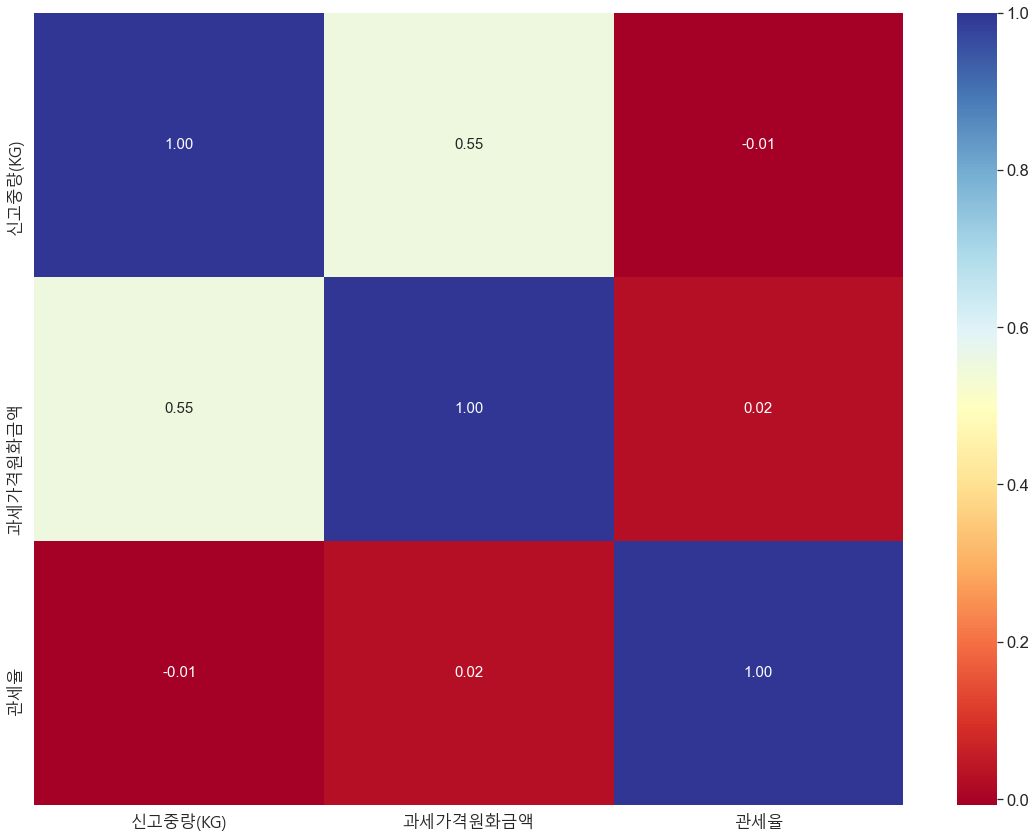

In [47]:
fig = plt.figure(figsize = (16, 12))
ax = fig.gca()

sns.set(font_scale = 1.5)
heatmap = sns.heatmap(corr.values, annot = True, fmt='.2f', annot_kws={'size':15},
                      yticklabels = cols, xticklabels = cols, ax=ax, cmap = "RdYlBu")
plt.tight_layout()
plt.show()

In [48]:
# 날짜 순에 따라 90:10 으로 훈련 및 테스트 데이터 분리
df_org_train = df_org.iloc[:int(len(df_org)*0.9), :]
df_org_test = df_org.iloc[int(len(df_org)*0.9):, :]

In [49]:
# 데이터 사이즈 확인
print(df_org_train.shape, df_org_test.shape)

(72952, 21) (8106, 21)


In [50]:
df_org.columns

Index(['신고번호', '신고일자', '통관지세관부호', '신고인부호', '수입자부호', '해외거래처부호', '특송업체부호', '수입통관계획코드', '수입신고구분코드', '수입거래구분코드', '수입종류코드', '징수형태코드', '신고중량(KG)', '과세가격원화금액', '운송수단유형코드', '반입보세구역부호', 'HS10단위부호', '적출국가코드', '원산지국가코드', '관세율구분코드', '관세율'], dtype='object')

In [51]:
# 범주형 변수 전처리 1단계: label encoding --> 각 범주형 변수가 갖는 클래스에 고유의 식별번호 부여
# 예) 수입자 상호: AAABB -> 1, 가나다라 -> 2, ...

label_encoding_ref = {}
for var in discrete_columns:
    label_encoding_ref[var] = {code: i+1 for i, code in enumerate(df_org_train[var].unique())} # 0 padding for unseen data in test
    #print(label_encoding_ref[var])
    df_org_train[var] = [label_encoding_ref[var][x] for x in df_org_train[var]]
    df_org_test[var] = [label_encoding_ref[var].get(x,0) for x in df_org_test[var]]

df_org_train.reset_index(drop=True, inplace=True)
df_org_test.reset_index(drop=True, inplace=True)

In [52]:
# 트레인데이터 샘플 확인
df_org_train.sample(50)

,신고번호,신고일자,통관지세관부호,신고인부호,수입자부호,해외거래처부호,특송업체부호,수입통관계획코드,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,신고중량(KG),과세가격원화금액,운송수단유형코드,반입보세구역부호,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,관세율
37015,NaN,93,41,933,5336,3,1,8,5,26,11,10,NaN,NaN,7,551,2170,86,85,35,NaN
47791,NaN,93,41,933,5336,3,1,8,5,26,11,10,NaN,NaN,7,551,2170,86,85,35,NaN
11718,90366846.0,49,8,26,5204,3051,10,3,4,1,1,4,8.564439,10.992262,2,344,156,9,22,9,0.000
55064,NaN,93,41,933,5336,3,1,8,5,26,11,10,NaN,NaN,7,551,2170,86,85,35,NaN
23808,NaN,93,41,933,5336,3,1,8,5,26,11,10,NaN,NaN,7,551,2170,86,85,35,NaN
1237,57730362.0,7,1,128,1066,3,1,2,1,2,3,1,5.410306,11.239056,1,60,345,13,7,1,0.080
62570,NaN,93,41,933,5336,3,1,8,5,26,11,10,NaN,NaN,7,551,2170,86,85,35,NaN
54058,NaN,93,41,933,5336,3,1,8,5,26,11,10,NaN,NaN,7,551,2170,86,85,35,NaN
15448,85210103.0,63,1,27,2045,3,1,6,1,2,3,6,5.374352,8.395932,1,5,51,1,7,3,0.080
2905,39594305.0,14,1,16,592,1250,32,3,1,1,1,1,7.746171,11.306795,2,194,55,26,29,9,0.000


In [53]:
# 테스트데이터 샘플 확인
df_org_test.sample(50)

,신고번호,신고일자,통관지세관부호,신고인부호,수입자부호,해외거래처부호,특송업체부호,수입통관계획코드,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,신고중량(KG),과세가격원화금액,운송수단유형코드,반입보세구역부호,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,관세율
3566,NaN,93,41,933,5336,3,1,8,5,26,11,10,NaN,NaN,7,551,2170,86,85,35,NaN
437,NaN,93,41,933,5336,3,1,8,5,26,11,10,NaN,NaN,7,551,2170,86,85,35,NaN
1300,NaN,93,41,933,5336,3,1,8,5,26,11,10,NaN,NaN,7,551,2170,86,85,35,NaN
7186,NaN,93,41,933,5336,3,1,8,5,26,11,10,NaN,NaN,7,551,2170,86,85,35,NaN
4519,NaN,93,41,933,5336,3,1,8,5,26,11,10,NaN,NaN,7,551,2170,86,85,35,NaN
2001,NaN,93,41,933,5336,3,1,8,5,26,11,10,NaN,NaN,7,551,2170,86,85,35,NaN
7270,NaN,93,41,933,5336,3,1,8,5,26,11,10,NaN,NaN,7,551,2170,86,85,35,NaN
1969,NaN,93,41,933,5336,3,1,8,5,26,11,10,NaN,NaN,7,551,2170,86,85,35,NaN
4988,NaN,93,41,933,5336,3,1,8,5,26,11,10,NaN,NaN,7,551,2170,86,85,35,NaN
287,NaN,93,41,933,5336,3,1,8,5,26,11,10,NaN,NaN,7,551,2170,86,85,35,NaN


In [54]:
# one-hot-encoding
# 예) A,B,C 3개의 클래스가 있는 범주형 변수를 다음과 같이 변환
# A -> [1,0,0] / B -> [0,1,0] / C -> [0,0,1]

# 원핫인코더 로딩
from sklearn.preprocessing import  OneHotEncoder
# 원핫인코더 활성화
xgbohe = OneHotEncoder(categories="auto", handle_unknown='ignore')
# 훈련데이터: 범주형 변수만 분리하여 원핫인코딩 적용
df_org_train_cat = xgbohe.fit_transform(df_org_train[discrete_columns])
df_org_train_cat = pd.DataFrame(df_org_train_cat.toarray(), 
                                columns = xgbohe.get_feature_names(discrete_columns))
# 수치형 변수 분리
df_org_train_num = df_org_train[numeric_columns]

# 원핫인코딩된 범주형 변수와 수치형 변수 재결합
df_org_train = pd.concat([df_org_train_num, df_org_train_cat], axis=1)

In [55]:
# 훈련데이터 샘플 확인
df_org_train.head(10)

신고중량(KG)   과세가격원화금액    관세율  신고일자_1  신고일자_2  신고일자_3  신고일자_4  신고일자_5  신고일자_6  신고일자_7  신고일자_8  신고일자_9  신고일자_10  신고일자_11  신고일자_12  신고일자_13  신고일자_14  신고일자_15  신고일자_16  신고일자_17  신고일자_18  신고일자_19  신고일자_20  신고일자_21  신고일자_22  신고일자_23  신고일자_24  신고일자_25  신고일자_26  신고일자_27  신고일자_28  신고일자_29  신고일자_30  신고일자_31  신고일자_32  신고일자_33  신고일자_34  신고일자_35  신고일자_36  신고일자_37  신고일자_38  신고일자_39  신고일자_40  신고일자_41  신고일자_42  신고일자_43  신고일자_44  신고일자_45  신고일자_46  신고일자_47  신고일자_48  신고일자_49  신고일자_50  신고일자_51  신고일자_52  신고일자_53  신고일자_54  신고일자_55  신고일자_56  신고일자_57  신고일자_58  신고일자_59  신고일자_60  신고일자_61  신고일자_62  신고일자_63  신고일자_64  신고일자_65  신고일자_66  신고일자_67  신고일자_68  신고일자_69  신고일자_70  신고일자_71  신고일자_72  신고일자_73  신고일자_74  신고일자_75  신고일자_76  신고일자_77  신고일자_78  신고일자_79  신고일자_80  신고일자_81  신고일자_82  신고일자_83  신고일자_84  신고일자_85  신고일자_86  신고일자_87  신고일자_88  신고일자_89  신고일자_90  신고일자_91  신고일자_92  신고일자_93  통관지세관부호_1  통관지세관부호_2  통관지세관부호_3  통관지세관부호_4  통관지세관부호_5  통관지세관부호_6  통관지세관부호_7  통관지세관부호_8  통관지세관부호_9  통관지세관부호_10  통관지세관부호_11  통관지세관부호_12  \
0  7.846238   9.868735  0.080     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0        1.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0         0.0         0.0         0.0   
1  8.296796  13.194446  0.400     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0        0.0        1.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0         0.0         0.0         0.0   
2  8.297618  13.861786  0.000     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0        0.0        0.0        1.0        0.0        0.0        0.0        0.0        0.0        0.0         0.0         0.0         0.0   
3  8.268168   9.885

In [56]:
# 테스트데이터: 범주형 변수만 분리하여 원핫인코딩 적용
df_org_test_cat = xgbohe.transform(df_org_test[discrete_columns])
df_org_test_cat = pd.DataFrame(df_org_test_cat.toarray(), 
                               columns = xgbohe.get_feature_names(discrete_columns))
# 수치형 변수 분리
df_org_test_num = df_org_test[numeric_columns]
# 원핫인코딩된 범주형 변수와 수치형 변수 재결합
df_org_test = pd.concat([df_org_test_num, df_org_test_cat], axis=1)

In [57]:
# 테스트데이터 샘플 확인
df_org_test.head(10)

신고중량(KG)  과세가격원화금액  관세율  신고일자_1  신고일자_2  신고일자_3  신고일자_4  신고일자_5  신고일자_6  신고일자_7  신고일자_8  신고일자_9  신고일자_10  신고일자_11  신고일자_12  신고일자_13  신고일자_14  신고일자_15  신고일자_16  신고일자_17  신고일자_18  신고일자_19  신고일자_20  신고일자_21  신고일자_22  신고일자_23  신고일자_24  신고일자_25  신고일자_26  신고일자_27  신고일자_28  신고일자_29  신고일자_30  신고일자_31  신고일자_32  신고일자_33  신고일자_34  신고일자_35  신고일자_36  신고일자_37  신고일자_38  신고일자_39  신고일자_40  신고일자_41  신고일자_42  신고일자_43  신고일자_44  신고일자_45  신고일자_46  신고일자_47  신고일자_48  신고일자_49  신고일자_50  신고일자_51  신고일자_52  신고일자_53  신고일자_54  신고일자_55  신고일자_56  신고일자_57  신고일자_58  신고일자_59  신고일자_60  신고일자_61  신고일자_62  신고일자_63  신고일자_64  신고일자_65  신고일자_66  신고일자_67  신고일자_68  신고일자_69  신고일자_70  신고일자_71  신고일자_72  신고일자_73  신고일자_74  신고일자_75  신고일자_76  신고일자_77  신고일자_78  신고일자_79  신고일자_80  신고일자_81  신고일자_82  신고일자_83  신고일자_84  신고일자_85  신고일자_86  신고일자_87  신고일자_88  신고일자_89  신고일자_90  신고일자_91  신고일자_92  신고일자_93  통관지세관부호_1  통관지세관부호_2  통관지세관부호_3  통관지세관부호_4  통관지세관부호_5  통관지세관부호_6  통관지세관부호_7  통관지세관부호_8  통관지세관부호_9  통관지세관부호_10  통관지세관부호_11  통관지세관부호_12  \
0       NaN       NaN  NaN     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0         0.0         0.0         0.0   
1       NaN       NaN  NaN     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0         0.0         0.0         0.0   
2       NaN       NaN  NaN     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0         0.0         0.0         0.0   
3       NaN       NaN  NaN     

In [24]:
# XGBoost 모델 생성
from xgboost import XGBClassifier
from sklearn.metrics import f1_score,roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [25]:
# 모델 활성화 및 설정
xgb_clf = XGBClassifier(n_estimators=10, max_depth=4, n_jobs=-1) #
# 모델 훈련 시 성능평가 데이터 설정 (별도의 성능평가 데이터를 구성할 수도 있으나, 여기서는 그냥 테스트데이터를 사용)
eval_set = [(df_org_train, org_train_y), (df_org_test, org_test_y)]
# 모델 훈련 (training/fitting)
xgb_clf.fit(df_org_train, org_train_y, eval_metric=["logloss"], eval_set=eval_set, verbose=True)

NameError: name 'org_train_y' is not defined